## Problem Statement
At least 13 stats now mandate ACT or SAT testing for all graudating HS students. Since 2018 Tennessee requires all students to complete an ACT as a requirement for graduation. Tennessee also has the 12th lowest ACT scores in the US. This project examines the effects of mandatory ACT testing on participation rates and scores since this mandate took effect, and how it has effected minority groups of students. 

## Background
ACT Tests are a very common alternative to the SAT, generally seen as more approachable to a wider range of students, and many colleges and universities will accept the ACT in lieu of the SAT. Many states are also now requiring ACT tests for graduation, subsidizing the costs of tests. This is intended to increase college application rates by obviating the barrier to taking the test. 

The test is created and administered by ACT Inc. a 501(c)(3) nonprofit organization. Statewide testing programs, in which states arrange with ACT for all their students to take the test, began in 2001 with Illinois and Colorado. These states chose the ACT to serve *in lieu* fo their own statewide assessment programs. In 2023 over twenty states have statewide programs to take the ACT [[source]](https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice).

Tennessee college participation rates had been decreasing since 2015, and in 2018 T.C.A. § 49-6-6001 went into effect, requiring all students who attend school in Tennessee in their 11th grade year to take an ACT test to recieve their diploma [[source]](https://www.tn.gov/education/districts/lea-operations/assessment/act-sat.html). 

According to ACT Inc. statewide testing is "*is a student motivator*", "*increase[s] interest in planning for college*", and "*increases college attendance ... for minority and low-income students*"[[source]](https://files.eric.ed.gov/fulltext/ED510717.pdf). 

### Data Files

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State


* [`2022__2021-22_ACT_school_suppressed.xlsx`](../data/2022__2021-22_ACT_school_suppressed.xlsx): 2022 ACT Scores for Tennessee
* [`2021__ACT_school_suppressed_20-21.xlsx`](../data/2021__ACT_school_suppressed_20-21.xlsx): 2021 ACT Scores for Tennessee
* [`2020__ACT_school_suppressed_2020.csv`](../data/2020__ACT_school_suppressed_2020.csv): 2020 ACT Scores for Tennessee
* [`2019__ACT_school_suppressed_2019.xlsx`](../data/2019__ACT_school_suppressed_2019.xlsx): 2019 ACT Scores for Tennessee
* [`2018__2017-18 ACT_school_suppressed.xlsx`](../data/2018__2017-18 ACT_school_suppressed.xlsx): 2018 ACT Scores for Tennessee
* [`2017__data_suppressed_school_level_ACT_2016-17.xlsx`](../data/2017__data_suppressed_school_level_ACT_2016-17.xlsx): 2017 ACT Scores for Tennessee
* [`2016__data_suppressed_school_level_ACT_2015-16.xlsx`](../data/2016__data_suppressed_school_level_ACT_2015-16.xlsx): 2016 ACT Scores for Tennessee


In [43]:
import os as os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## National ACT Data Import and Cleaning
### Notes on data sources/files:
This data was collected from Prepscholar.com [(source)](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows) and is represented here in 3 files: `act2017.csv`, `act_2018.csv`, `act_2019.csv` - which are stored in the data/ directory.
- apparent typo in `act_2017.csv`; an 'x' in the score for Wyoming - which was corrected
- apparent typo in `act_2018.csv`; "District of columbia" is misspelled - also corrected
- score changes are just the differance in 2019 and 2017's scores for each state

In [ ]:
us_act_2017 = pd.read_csv('../data/act_2017.csv', usecols = ['State', 'Composite'])
# there is an "x" in the entry for Wyoming's composite score; I'm assuming it's a typo
us_act_2017.Composite = us_act_2017.Composite.str.strip('x') 
us_act_2017['year'] = 2017
us_act_2017['file'] = 'act_2017.csv'

us_act_2018 = pd.read_csv('../data/act_2018.csv', usecols = ['State', 'Composite'])
# 'District of columbia' is misspelled in this file
us_act_2018['State'].replace('District of columbia', 'District of Columbia', inplace = True)
us_act_2018['year'] = 2018
us_act_2018['file'] = 'act_2018.csv'

us_act_2019 = pd.read_csv('../data/act_2019.csv', usecols = ['State', 'Composite'])
us_act_2019['year'] = 2019
us_act_2019['file'] = 'act_2019.csv'

us_act = pd.concat([us_act_2017, us_act_2018, us_act_2019], ignore_index=True)

us_act.columns = us_act.columns.str.lower()
us_act['composite'] = pd.to_numeric(us_act['composite'])

us_act_score_change = (us_act
                        .filter(['state', 'year', 'composite'])
                        .pivot_table(index = 'state', columns = 'year'))

us_act_score_change['comp_change'] = us_act_score_change['composite'][2019] - us_act_score_change['composite'][2017] 

us_act_score_change = (
    us_act
    .merge(us_act_score_change['comp_change'], right_index= True, left_on = 'state')
    .query('year == 2017')
    .query('state != "National"')
    .filter(['state', 'comp_change']))


us_act_score_mean = (us_act
                        .filter(['state', 'year', 'composite'])
                        .pivot_table(index = 'state', columns = 'year'))

us_act_score_mean['comp_mean'] = (us_act_score_mean['composite'][2017] + 
                                  us_act_score_mean['composite'][2018] + 
                                  us_act_score_mean['composite'][2019])/3 
us_act_score_mean.head()
us_act_score_mean = (
    us_act
    .merge(us_act_score_mean['comp_mean'], right_index= True, left_on = 'state')
    .query('year == 2017')
    .query('state != "National"')
    .filter(['state', 'comp_mean']))

In [435]:
us_act_score_mean = (us_act
                        .filter(['state', 'year', 'composite'])
                        .pivot_table(index = 'state', columns = 'year'))

us_act_score_mean['comp_mean'] = (us_act_score_mean['composite'][2017] + 
                                  us_act_score_mean['composite'][2018] + 
                                  us_act_score_mean['composite'][2019])/3 
us_act_score_mean.head()
us_act_score_mean = (
    us_act
    .merge(us_act_score_mean['comp_mean'], right_index= True, left_on = 'state')
    .query('year == 2017')
    .query('state != "National"')
    .filter(['state', 'comp_mean']))

## National ACT Trends
### Average Composite Scores

From 2017 - 2019:
* The median change in score was -0.1 points
* Only 3 states increased their score by more than 0.5 points
* Only 24% of states increased it by more than 0.25 points
* Only 36% of states increased their score at all



In [424]:
print("Median change in average ACT Composite score: ", end='')
print(str(round(us_act_score_change.comp_change.median(), 1)))

print("Percent of states who's scores increased at all: ", end='')
print(str(int(us_act_score_change.query('comp_change > 0').shape[0]/50 * 100)) + '%')

print("Percent of states who's scores increased by more than 0.10 points: ", end='')
print(str(int(us_act_score_change.query('comp_change > 0.1').shape[0]/50 * 100)) + '%')

print("Percent of states who's scores increased by more than 0.25 points: ", end='')
print(str(int(us_act_score_change.query('comp_change > 0.25').shape[0]/50 * 100)) + '%')

print("Number of states who's scores increased by more than 0.50 points:  ", end='')
print(str(int(us_act_score_change.query('comp_change > 0.5').shape[0])))

Median change in average ACT Composite score: -0.1
Percent of states who's scores increased at all: 36%
Percent of states who's scores increased by more than 0.10 points: 34%
Percent of states who's scores increased by more than 0.25 points: 24%
Number of states who's scores increased by more than 0.50 points:  3


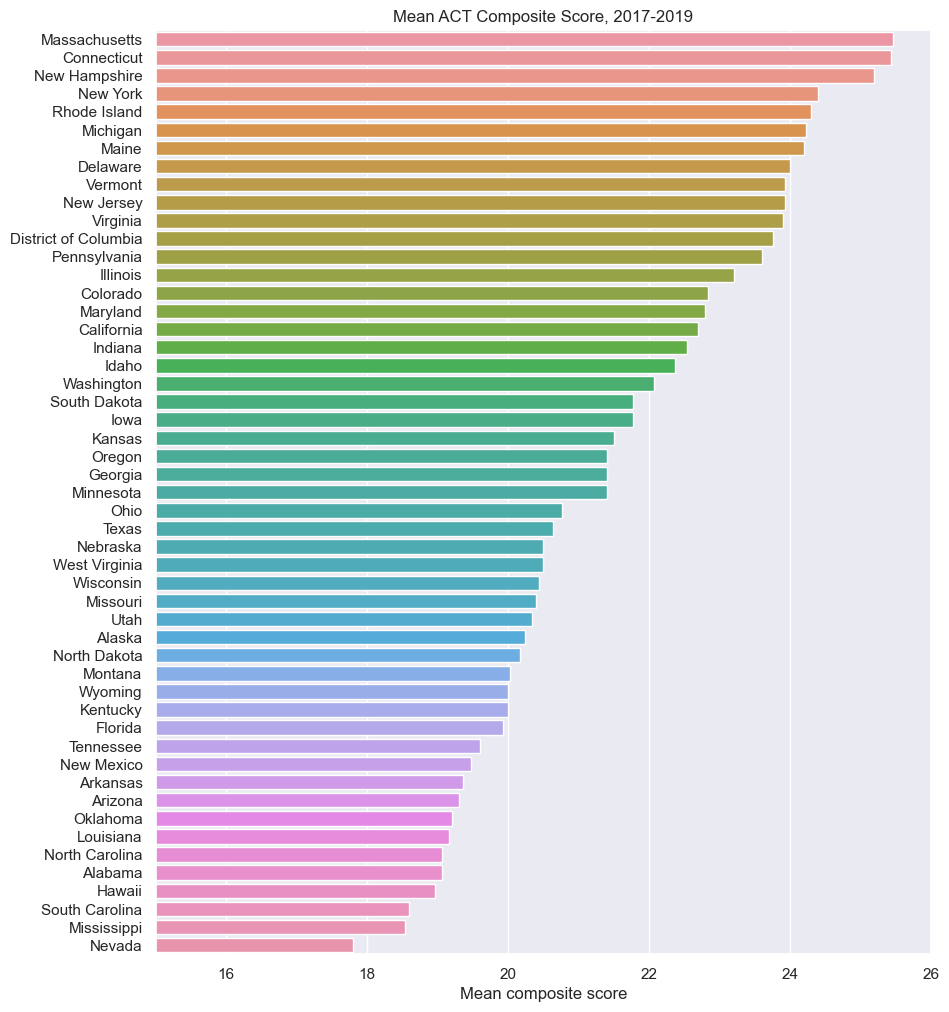

In [692]:
us_act_score_mean.sort_values('comp_mean', ascending = False, inplace = True)
sns.set(rc={"figure.figsize":(10, 12)}) 
sns.barplot(data = us_act_score_mean, 
            y = 'state', x = 'comp_mean'
           ).set(title = 'Mean ACT Composite Score, 2017-2019',
                 xlabel = 'Mean composite score',
                 ylabel = None)
plt.xlim(15, 26);

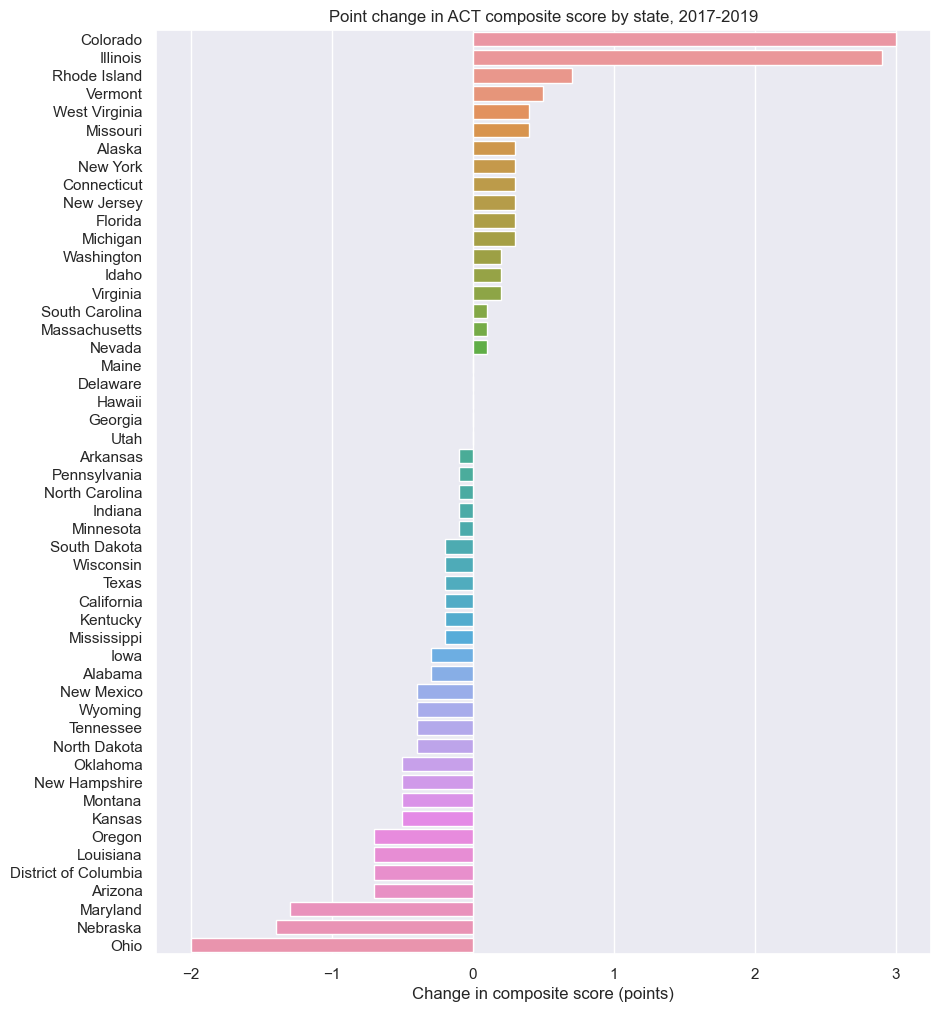

In [691]:
us_act_score_change.sort_values('comp_change', ascending = False, inplace = True)
sns.set(rc={"figure.figsize":(10, 12)}) 
sns.barplot(data = us_act_score_change, 
            y = 'state', x = 'comp_change'
           ).set(title = 'Point change in ACT composite score by state, 2017-2019',
                 xlabel = 'Change in composite score (points)',
                 ylabel = None);

## Tennessee Data Import and Cleaning
### Notes on data sources/files:
- Source: https://www.tn.gov/education/districts/finance-and-monitoring/data/data-downloads.html
- For convenience and clarity, all files for Tennessee were prefixed with `YYYY__` where `YYYY` is the year the data was from.
- The years referenced here are all intended to be the year in which the school-term ended. For example, ACT results from the school year starting in August 2021 and ending in May 2022 would be represented as being from 2022.
- To protect student privacy some score averages and participation rates have been replace with `*` when the number of valid tests for that category is less than 10. I have decided to remove those instances from this analysis. For columns `number_scoring_21_or_higher`, `percent_scoring_21_or_higher`, `number_scoring_below_19` and `percent_scoring_below_19` data is suppressed with `**` when more than 95% or less than 5% of test takers fall into any of those categoties. This is meant to prevent deducing individual student scores. For instance, if 95% of students at a given school scored 19 or below, then it could be reasoned that an individual student known to have taken that test scored below 19. Similarly if only 5% of students scored 21 or higher, then it could be reasoned that an individual student from that school most likely scored below 21. 
- for 2017 there was a subgroup category `English Language Learners with T1/T2` which wasn't part of the analysis from other years, I removed these rows for the sake of consistency. 
    

In [ ]:
us_act_2019 = pd.read_csv('../data/act_2019.csv', usecols = ['State', 'Composite'])
us_act_2019['year'] = 2019
us_act_2019['file'] = 'act_2019.csv'

In [571]:
tn_act_files = [
    '../data/2022__2021-22_ACT_school_suppressed.xlsx',
    '../data/2021__ACT_school_suppressed_20-21.xlsx',
    '../data/2020__ACT_school_suppressed_2020.csv',
    '../data/2019__ACT_school_suppressed_2019.xlsx',
    '../data/2018__2017-18 ACT_school_suppressed.xlsx',
    '../data/2017__data_suppressed_school_level_ACT_2016-17.xlsx',
    '../data/2016__data_suppressed_school_level_ACT_2015-16.xlsx'
]

tn_act_file_years = [2022, 2021, 2020, 2019, 2018, 2017, 2016]

# Read in all the files and annotate with year and filename, 
# and concatenate to single dataframe
tn_act_dfs = []
for i in range(len(tn_act_files)):
    if tn_act_files[i].endswith('.csv'):
        df = pd.read_csv(tn_act_files[i])
    else:
        df = pd.read_excel(tn_act_files[i])
    df['file'] = tn_act_files[i]
    df['year'] = tn_act_file_years[i]
    tn_act_dfs.append(df)
    
tn_act = pd.concat(tn_act_dfs)

# Normalize column names to lowercase with spaces replaced with "_"
tn_act.columns = tn_act.columns.str.lower()
tn_act.columns = tn_act.columns.str.replace(" ", "_")

tn_act = (tn_act
 .filter(['year', 'school', 'school_name', 'subgroup', 'valid_tests', 'participation_rate', 'average_composite_score', 'file'])
    )


# Remove subgroup called 'English Language Learners with T1/T2' (see above)
tn_act = tn_act.query('subgroup != "English Language Learners with T1/T2"')

# Replace suppressed data with np.NaN (see above)
tn_act.participation_rate.replace('*', np.NaN, inplace = True)
tn_act.average_composite_score.replace('*', np.NaN, inplace = True)

tn_act.average_composite_score = pd.to_numeric(tn_act.average_composite_score)
tn_act.participation_rate = pd.to_numeric(tn_act.participation_rate)

tn_act.head(10)

,year,school,school_name,subgroup,valid_tests,participation_rate,average_composite_score,file
0,2022,2,Anderson County High School,All Students,249,99.0,18.9,../data/2022__2021-22_ACT_school_suppressed.xlsx
1,2022,2,Anderson County High School,Black/Hispanic/Native American,5,NaN,NaN,../data/2022__2021-22_ACT_school_suppressed.xlsx
2,2022,2,Anderson County High School,Economically Disadvantaged,75,97.0,17.1,../data/2022__2021-22_ACT_school_suppressed.xlsx
3,2022,2,Anderson County High School,English Learners,1,NaN,NaN,../data/2022__2021-22_ACT_school_suppressed.xlsx
4,2022,2,Anderson County High School,Students with Disabilities,29,94.0,14.5,../data/2022__2021-22_ACT_school_suppressed.xlsx
5,2022,4,Anderson County Innovation Academy,All Students,11,100.0,18.5,../data/2022__2021-22_ACT_school_suppressed.xlsx
6,2022,4,Anderson County Innovation Academy,Black/Hispanic/Native American,1,NaN,NaN,../data/2022__2021-22_ACT_school_suppressed.xlsx
7,2022,4,Anderson County Innovation Academy,Economically Disadvantaged,4,NaN,NaN,../data/2022__2021-22_ACT_school_suppressed.xlsx
8,2022,25,Clinton High School,All Students,249,98.0,18.7,../data/2022__2021-22_ACT_school_suppressed.xlsx
9,2022,25,Clinton High School,Black/Hispanic/Native American,23,96.0,17.3,../data/2022__2021-22_ACT_school_suppressed.xlsx


## Tennessee ACT Trends
### Average Composite Scores

From 2016 - 2022:
* Participation rates have increased for all students
* Average composite scores have decreased
* Both of these coincide with the ACT testing mandate


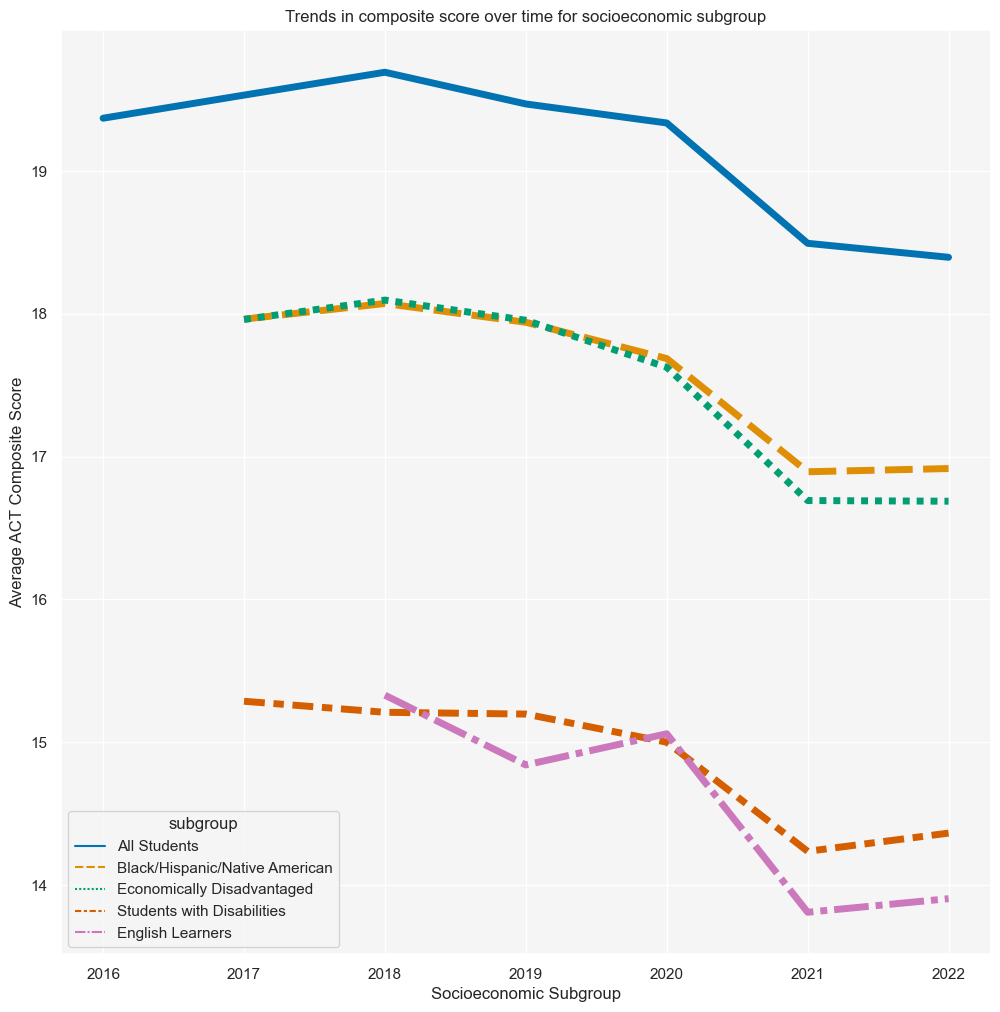

In [695]:
line_plot_data = (tn_act
                  #.query('subgroup == "All Students"')
                  .groupby(['year', 'subgroup'])['average_composite_score']
                  .agg(['mean']))

sns.set(rc={"figure.figsize":(12, 12),
           'axes.facecolor':'whitesmoke', 
            'figure.facecolor':'white'})

sns.set_palette('colorblind')

sns.lineplot(data=line_plot_data, 
             x = 'year', y = 'mean',
             hue = 'subgroup',
             style = 'subgroup',
             linewidth = 5
            ).set(title = 'Trends in composite score over time for socioeconomic subgroup',
                 ylabel = 'Average ACT Composite Score',
                 xlabel = 'Socioeconomic Subgroup'
                 );

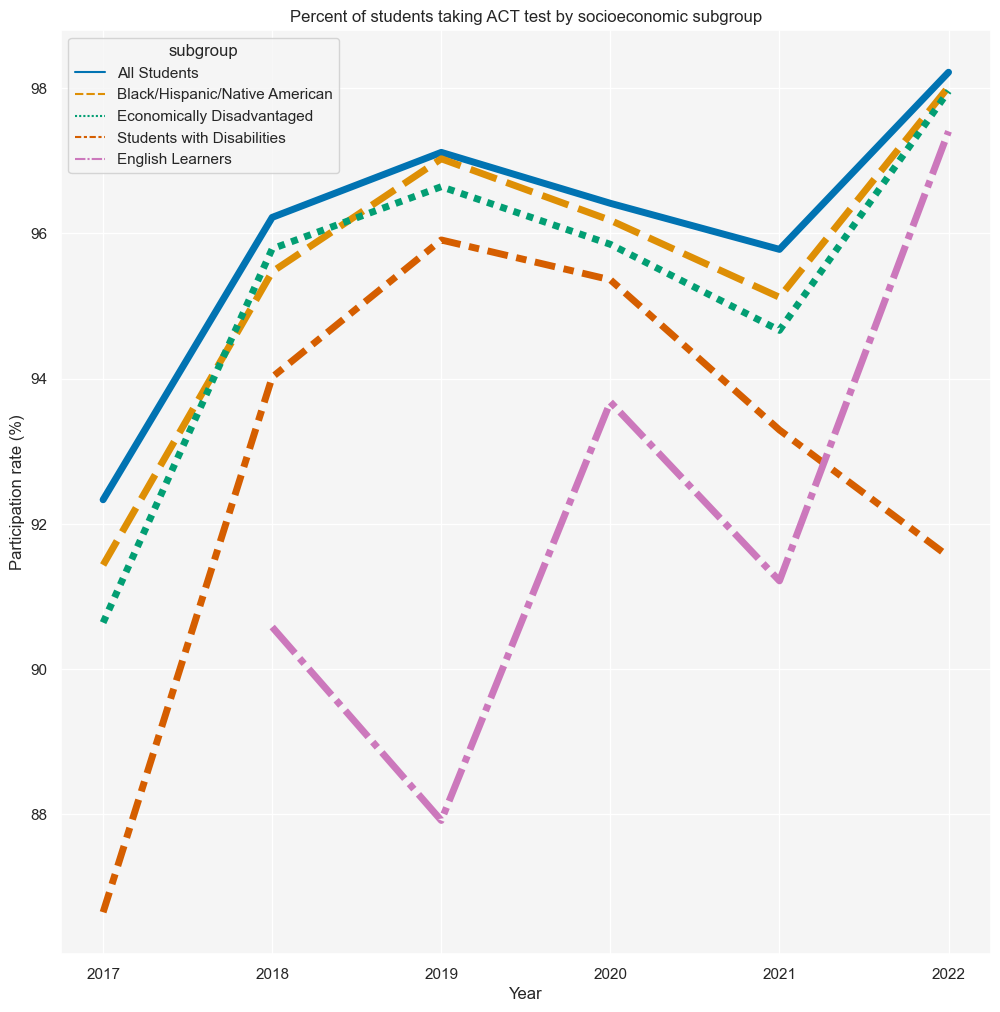

In [696]:
line_plot_data = (tn_act
                  #.query('subgroup == "All Students"')
                  .groupby(['year', 'subgroup'])['participation_rate']
                  .agg(['mean']))

sns.set(rc={"figure.figsize":(12, 12),
           'axes.facecolor':'whitesmoke', 
            'figure.facecolor':'white'})

sns.set_palette('colorblind')

sns.lineplot(data=line_plot_data, 
             x = 'year', y = 'mean',
             hue = 'subgroup',
             style = 'subgroup',
             linewidth=5
            ).set(title = 'Percent of students taking ACT test by socioeconomic subgroup',
                 ylabel = 'Participation rate (%)',
                 xlabel = 'Year'
                 );

### Conclusions and Recommendations
Despite the claims of ACT Inc. and the best intentions of the State of Tennessee, this analysis can find no positive effect of the ACT testing mandate on student performance or college participation.